
### M2_SII_23_24:
<center><h1>TP3 RCR2:</h1></center>
<center><h2>Réseaux causaux Bayésiens</h2></center>
---
FERKOU SARAH - KHEMISSI MAROUA



In [ ]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.1 MB/s eta 0:00:00


In [ ]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork
# Etablissement de la structure
climate_model = BayesianNetwork([
    ('F', 'D'),
    ('C', 'D'),
    ('D', 'P'),
    ('C', 'M'),
])
# Définition des relations
fire_cpd = TabularCPD(
    variable='F',
    variable_card=2,
    values=[[.6], [.4]]
)

climate_cpd = TabularCPD(
    variable='C',
    variable_card=2,
    values=[[.7], [.3]]
)
mitigation_cpd = TabularCPD(
    variable='M',
    variable_card=2,
    values=[[.8, .9],
            [.2, .1]],
    evidence=['C'],
    evidence_card=[2]
)

deforestation_cpd = TabularCPD(
    variable='D',
    variable_card=2,
    values=[[.7, .8, .95, .8], [.3, .2, .05, .2]],
    evidence=['F', 'C'],
    evidence_card=[2, 2]
)

extreme_weather_cpd = TabularCPD(
    variable='P',
    variable_card=2,
    values=[[.9, .95], [.1, .05]],
    evidence=['D'],
    evidence_card=[2]
)


# Ajout des relations à notre modèle
climate_model.add_cpds(deforestation_cpd, fire_cpd, climate_cpd, mitigation_cpd, extreme_weather_cpd)

# Re-vérification de la structure de notre modèle
climate_model.get_cpds()

[<TabularCPD representing P(D:2 | F:2, C:2) at 0x7ec68055cdc0>,
 <TabularCPD representing P(F:2) at 0x7ec73e666e00>,
 <TabularCPD representing P(C:2) at 0x7ec73e665cc0>,
 <TabularCPD representing P(M:2 | C:2) at 0x7ec73e665c30>,
 <TabularCPD representing P(P:2 | D:2) at 0x7ec73e665db0>]

In [ ]:
from pgmpy.inference import VariableElimination
# Calcul des probabilités existantes pour vérifier que tout est correct
prob_deforestation = VariableElimination(climate_model).query(variables=['D'])
print(prob_deforestation)


+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.8000 |
+------+----------+
| D(1) |   0.2000 |
+------+----------+


In [ ]:
# Faire un autre calcul de probabilité
prob_extreme_weather = VariableElimination(climate_model).query(variables=['P'])
print(prob_extreme_weather)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.9100 |
+------+----------+
| P(1) |   0.0900 |
+------+----------+


In [ ]:
# Probabilité d'avoir le changement climatique si on a la déforestation
proba_climate_deforestation = VariableElimination(climate_model).query(variables=['C'], evidence={'D': 1})
print(proba_climate_deforestation)

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.7000 |
+------+----------+
| C(1) |   0.3000 |
+------+----------+


In [ ]:
# Probabilité d'avoir des mesures d'atténuation si on a le changement climatique
proba_mitigation_climate = VariableElimination(climate_model).query(variables=['M'], evidence={'C': 1})
print(proba_mitigation_climate)

+------+----------+
| M    |   phi(M) |
+======+==========+
| M(0) |   0.9000 |
+------+----------+
| M(1) |   0.1000 |
+------+----------+


# Conception d’un arbre multi-connected


In [ ]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork

# Establishing the structure
climate_model = BayesianNetwork([
    ('C', 'F'),
    ('C', 'D'),
    ('F', 'D'),
    ('D', 'P'),
    ('O', 'P'),
])

# Defining the relationships
changement_climate_cpd = TabularCPD(
    variable='C',
    variable_card=2,
    values=[[.75], [.25]]
)

feu_cpd = TabularCPD(
    variable='F',
    variable_card=2,
    values=[[.6, .3],
            [.4, .7]],
    evidence=['C'],
    evidence_card=[2]
)

defostration_cpd = TabularCPD(
    variable='D',
    variable_card=2,
    values=[
        [.99, .8, .7, .4], [.01, .2, .3, .6]],
    evidence=['C', 'F'],
    evidence_card=[2, 2]
)

ocean_cpd = TabularCPD(
    variable='O',
    variable_card=2,
    values=[[.6], [.4]]
)

phenomenes_cpd = TabularCPD(
    variable='P',
    variable_card=2,
    values=[[.9, .4, .2, .3], [.1, .6, .8, .7]],
    evidence=['O', 'D'],
    evidence_card=[2, 2]
)

# Adding the relationships to our model
climate_model.add_cpds(changement_climate_cpd,
                       feu_cpd, defostration_cpd, ocean_cpd, phenomenes_cpd)

# Checking the structure of our model
climate_model.get_cpds()

[<TabularCPD representing P(C:2) at 0x7ec67253d8a0>,
 <TabularCPD representing P(F:2 | C:2) at 0x7ec67253d900>,
 <TabularCPD representing P(D:2 | C:2, F:2) at 0x7ec67253d960>,
 <TabularCPD representing P(O:2) at 0x7ec67253d9c0>,
 <TabularCPD representing P(P:2 | O:2, D:2) at 0x7ec67253d930>]

In [ ]:
#trouver les chemins des noeuds pour determiner qu'est ce qui donne des infos sur un noeud
print(climate_model.active_trail_nodes('D'))
print()

print(climate_model.active_trail_nodes('C'))
print()

print(climate_model.active_trail_nodes('F'))

{'D': {'D', 'P', 'F', 'C'}}

{'C': {'C', 'D', 'F', 'P'}}

{'F': {'C', 'D', 'F', 'P'}}


In [ ]:
from pgmpy.inference import VariableElimination
climate_infer = VariableElimination(climate_model)
#calcul des proba existante pour vérifier que tout est correct
prob_changement = climate_infer.query(variables=['C'])
print(prob_changement)

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.7500 |
+------+----------+
| C(1) |   0.2500 |
+------+----------+


In [ ]:
#probabilité d'avoir une phenomene meteorologique quand il ya une defostration (proba conditionelle)
proba_phenomene_def = climate_infer.query(variables=['P'], evidence= {'D':1})
print(proba_phenomene_def)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3600 |
+------+----------+
| P(1) |   0.6400 |
+------+----------+


{('X1', 'X3'): Text(-0.345809220284058, 0.5278474550064115, ''),
 ('X1', 'X4'): Text(0.2816753658700262, 0.23156992268139964, ''),
 ('X2', 'X4'): Text(0.3472854547387738, -0.1457034043559915, ''),
 ('X2', 'X5'): Text(-0.17124263250528013, -0.5749175005677971, ''),
 ('X2', 'X7'): Text(0.5071582341407501, -0.07384399123993968, ''),
 ('X2', 'X8'): Text(-0.29797519820142077, -0.6867709700486295, ''),
 ('X4', 'X7'): Text(0.7561503438459591, 0.153994544501328, ''),
 ('X5', 'X8'): Text(-0.5675111757402658, -0.8881465305191676, ''),
 ('X6', 'X7'): Text(0.8765672954684185, 0.13295969679160405, '')}

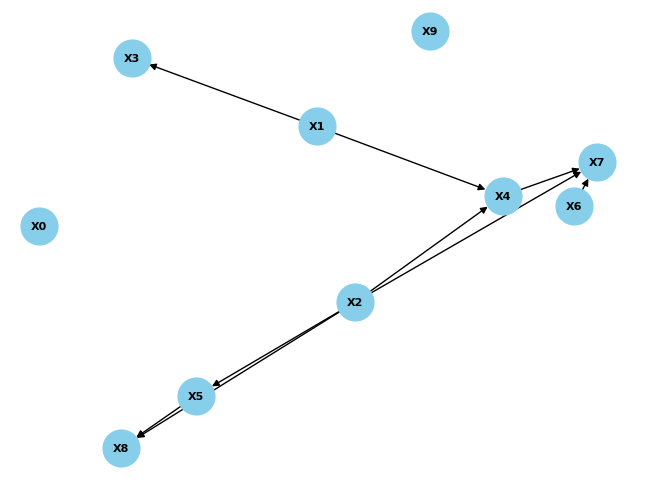

In [ ]:
import networkx as nx
import random

def generate_random_bayesian_network(num_nodes, max_parents_per_node):
    # Création d'un graphe dirigé
    G = nx.DiGraph()

    # Ajout des nœuds au graphe
    for i in range(num_nodes):
        G.add_node(f'X{i}')

    # Ajout des arcs entre les nœuds
    for i in range(num_nodes):
        num_parents = random.randint(0, min(i, max_parents_per_node))
        parents = random.sample(range(i), num_parents)
        for parent in parents:
            G.add_edge(f'X{parent}', f'X{i}')

    # Attribution de probabilités aléatoires aux CPDs
    for node in G.nodes():
        num_states = random.randint(2, 5)  # Nombre aléatoire d'états pour chaque variable
        states = [f'State{i}' for i in range(num_states)]
        cpd_values = [random.random() for _ in range(num_states)]
        cpd_values = [val / sum(cpd_values) for val in cpd_values]  # Normalisation des probabilités
        G.nodes[node]['states'] = states
        G.nodes[node]['probabilities'] = cpd_values

    return G

# Paramètres
num_nodes = 10  # Nombre total de variables
max_parents_per_node = 3  # Nombre maximal de parents par variable

# Génération du réseau bayésien
random_bayesian_network = generate_random_bayesian_network(num_nodes, max_parents_per_node)

# Affichage du graphe
pos = nx.spring_layout(random_bayesian_network)
nx.draw(random_bayesian_network, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(random_bayesian_network, pos, edge_labels={(i, j): '' for i, j in random_bayesian_network.edges()})